In [2]:
%load_ext autoreload
%autoreload 2

import train
import evaluate

In [18]:
params = train.CNNParams(
    embed_size=100,
    dropout=0.5,
    epochs=200,
    filters=[(33, 3), (33, 5), (33, 7)],
    num_layers=1,
    max_norm=3,
)

char_params = train.CharCNNParams(
    dropout=0.5,
    epochs=200,
    max_norm=3,
)

word_results, char_results = evaluate.run(
    params,
    char_params,
    training_sizes=[200, 800, 1600, 2400, 3000],
    window_sizes=[(0, 0), (0, 1), (1, 1), (2, 2)],
    k=10,
    kmeans_path="../clustered_data/15",
    num_clusters=15,
    num_clusters_gmm=18,
    use_bow=True,
)

  0%|          | 0/10 [00:00<?, ?it/s]/home/maarten/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

 10%|█         | 1/10 [00:00<00:00,  9.02it/s]/home/maarten/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/maarten/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

 30%|███       | 3/10 [00:00<00:00,  9.59it/s]/home/maarten/.local/lib/python3.7/site-packages/sklear

In [38]:
import pandas as pd

table = []                                                                                                 
for win in word_results.baseline.keys():                                                                   
    for train_size in word_results.baseline[win].keys():                                                   
            for i in range(len(word_results.baseline[win][train_size][2])):                                    
                table.append(["Bag of words", "Baseline", sum(win), train_size, word_results.baseline[win][train_size][2][i]])                                                                                     
                                                                                                                 
df = pd.DataFrame.from_records(                                                                            
    table, columns=["model", "method", "window", "size", "score"]                                          
)

df.window += 1

/home/maarten/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


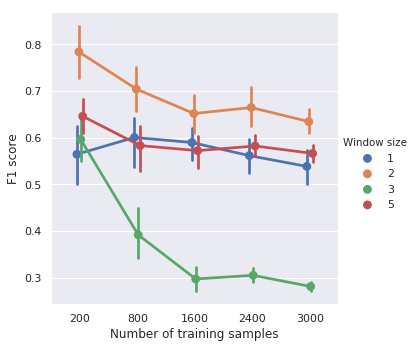

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

df = df.rename(columns={"window": "Window size"})

g = sns.catplot(
    x="size", y="score", data=df, kind="point", hue="Window size",
    dodge=True,
)
g.set_axis_labels("Number of training samples", "F1 score")
g.set_titles(col_template="Model = {row_name}", row_template="Window size = {col_name}")

plt.savefig("bow_results.pdf")

                                  score                    
                                   mean       std         p
size model    method   window                              
200  TokenCNN Baseline 0       0.831335  0.011848       NaN
              K-Means  0       0.843846  0.014898  0.031170
              GMM      0       0.842445  0.010787  0.030924
     CharCNN  Baseline 0       0.855736  0.011701       NaN
              K-Means  0       0.851318  0.014746  0.206388
              GMM      0       0.851584  0.022158  0.586711
800  TokenCNN Baseline 0       0.842933  0.010159       NaN
              K-Means  0       0.850113  0.005171  0.045224
              GMM      0       0.859137  0.014198  0.005521
     CharCNN  Baseline 0       0.867169  0.018861       NaN
              K-Means  0       0.863595  0.021780  0.722963
              GMM      0       0.880255  0.017785  0.141477
1600 TokenCNN Baseline 0       0.849773  0.006378       NaN
              K-Means  0       0.859235 

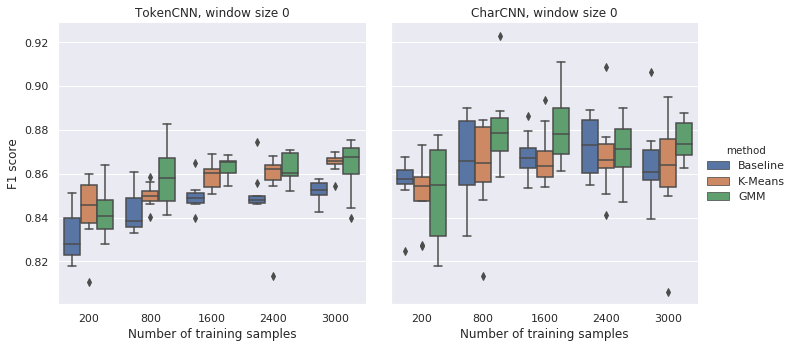

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel

df = df_window0
def p(s):
    i = s.keys()[0]
    size = df.iloc[i]["size"]
    window = df.iloc[i]["window"]
    method = df.iloc[i]["method"]
    model = df.iloc[i]["model"]

    baseline_scores = df[(df["size"] == size) & (df["model"] == model) & (df["window"] == window) & (df["method"] == "Baseline")].score
    scores = s.tolist()
    return ttest_rel(baseline_scores, scores)[1]

evaluate.plot_sns(df)
print(df.groupby(["size", "model", "method", "window"], sort=False).aggregate([np.mean, np.std, p]))

dir = "concat_window0"
os.makedirs(dir, exist_ok=True)
os.chdir(dir)

#try:
#    plt.savefig("plot.pdf")
#    df.groupby(["size", "model", "method", "window"], sort=False).aggregate([np.mean, np.std, p]).to_latex("table.tex")
#    df.groupby(["size", "model", "method", "window"], sort=False).aggregate([np.mean, np.std, p]).to_csv("table.csv")
#except e:
#    print(e)
#finally:
#    os.chdir("..")